In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
u = np.array([[4], [2], [1]])

In [3]:
def step(x, rule_b):
    """Compute a single stet of an elementary cellular
    automaton."""
    # The columns contains the L, C, R values
    # of all cells.
    y = np.vstack((np.roll(x, 1), x,
                   np.roll(x, -1))).astype(np.int8)
    # We get the LCR pattern numbers between 0 and 7.
    z = np.sum(y * u, axis=0).astype(np.int8)
    # We get the patterns given by the rule.
    return rule_b[7 - z]

In [4]:
def generate(rule, size=100, steps=100):
    """Simulate an elementary cellular automaton given
    its rule (number between 0 and 255)."""
    # Compute the binary representation of the rule.
    rule_b = np.array(
        [int(_) for _ in np.binary_repr(rule, 8)],
        dtype=np.int8)
    
    x = np.zeros((steps, size), dtype=np.int8)
    
    # Random initial state.
    x[0, :] = np.random.rand(size) < .5
    
    # Apply the step function iteratively.
    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_b)
        
    return x

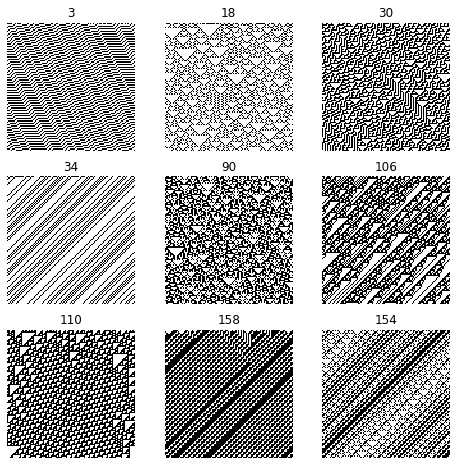

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
rules = [3, 18, 30, 34,
         90, 106, 110,
         158, 154, 184]
for ax, rule in zip(axes.flat, rules):
    x = generate(rule)
    ax.imshow(x, interpolation='none',
              cmap=plt.cm.binary)
    ax.set_axis_off()
    ax.set_title(str(rule))